# Multi-label Computer Vison Classification

We are going to explore FastAI and PyTorch to model an image recognition application in this notebook. 

## Importing the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
# Importing the dataset 
originalData = pd.read_csv('images.csv')

In [3]:
originalData.head()


,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [4]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      5403 non-null   object
 1   sender_id  5403 non-null   int64 
 2   label      5403 non-null   object
 3   kids       5403 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 132.0+ KB


The dataset provided here contains 5000+ high resolution images of clothes. 

The model is designed based on this dataset to distinguish among various types of clothing. This dataset conatins two different variables identifying the piece of clothing - the first variable determines if the image contains a children's clothing and the second variable names the item. After the model has been designed, iPython widgets are used to test the model which can then be deployed onto a server for full functioning end-to-end application

The 'image' column contains the names of the images. This will be mapped to the folder they are stored at to access them while creating the model. The 'label' column identifies the piece of clothing whereas the 'kids' column identifies if the clothing is for children or not.

In [5]:
# Classes and their counts within the dataset
originalData['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

## 1. Data handeling.


We are going to make a copy of the original dataset so that any modification made onto the copied dataset does not affect the original data. :)

In [6]:
copiedData = originalData.copy()

i) Replaceing 'Not sure' with 'Not_sure'.

In [7]:
copiedData.loc[copiedData['label']=='Not sure','label'] = 'Not_sure'

In [8]:
copiedData.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not_sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not_sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


ii) Adding suffix '.jpg' to all image files in the dataframe to open them within the model.

In [9]:
copiedData['image'] = copiedData['image'] + '.jpg'

Now let's see the changes that we made to our coppied dataset.

In [10]:
copiedData['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1       ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2       00627a3f-0477-401c-95eb-92642cbe078d.jpg
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
                          ...                   
5398    dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
5399    befa14be-8140-4faf-8061-1039947e329d.jpg
5400    5379356a-40ee-4890-b416-2336a7d84061.jpg
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg
5402    32b99302-cec7-4dec-adfa-3d4029674209.jpg
Name: image, Length: 5403, dtype: object

## 2. Data preprocessing.


We are going to create a new feature named "copiedData[label_category]" by merging the two lables 'label' and 'kids' into one column using space as a delimiter.

In [11]:
copiedData['label_category'] = copiedData['label'] + ' ' + copiedData['kids'].astype(str)


In [12]:
copiedData.head()

,image,sender_id,label,kids,label_category
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,124,Not_sure,False,Not_sure False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,148,T-Shirt,False,T-Shirt False
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,94,Not_sure,False,Not_sure False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,43,T-Shirt,False,T-Shirt False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,189,Shoes,False,Shoes False


Now we are going to create another dataframe to keep only the images and the newly created labels for the model to process.

In [13]:
new_df = copiedData[['image', 'label_category']]

Let's look into the newly created dataframe

In [14]:
new_df.head()

,image,label_category
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not_sure False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt False
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not_sure False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes False


The "sender_id" is being removed and this dataframe contains only two features, one is "image" and the other one is "label_category"

The dataframe is cleaned and preprcessed for ready to develop the model. It has to be transformed in such a way that it can be used to create the model.

We are using **FastAIs Convolusional Neural Network classifier 'resnet50'**. This CNN has 50 layers with pretrained weights.

The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.

ResNet first introduced the concept of skip connection. The concept is stacking convolution layers together one after the other. We still stack convolution layers as before but we now also add the original input to the output of the convolution block. This is called skip connection

The input to create the learner is a dataloader and the model 'resnet50'. The learner uses 'accuracy_multi', which calculates the accuracy for a multi-category dataset using a specified threshold. The threshold by default is 0.5, but for this model, we can start at 0.2 and then test the outcome of other threshold values.

To create the dataloader, we need to have a DataBlock that will identify the dependent (labels) and the independent (images) variables using the MultiCategoryBlock and ImageBlock respectively. Using ImageBlock will help open the image and convert to a tensor, while MultiCategoryBlock will help with the multilabel classification.

Now we are going to create functions that will be used to open the images and get the categories of the image for the DataBlock.



In [15]:
path = 'C:/Users/Rain/Desktop/clothing-dataset-master'
def get_x(r): return path+'/images_original/'+r['image'] # create path to open images in the original folder
def get_y(r): return r['label_category'].split(' ') # split the labels using space as a delimitter

In [16]:
# Create DataBlock
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                  get_x = get_x, get_y = get_y,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))  # ensure every item is of the same size

dls = dblock.dataloaders(new_df) # collates items from dataset into minibatches

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


We can view the dataloader images and their subsequent labels

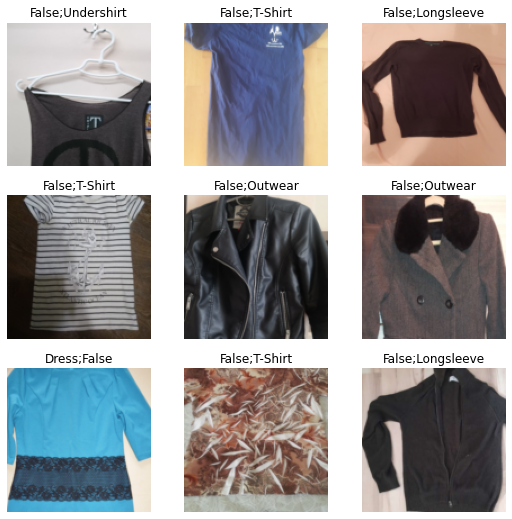

In [17]:
dls.show_batch(nrows=3, ncols=3)

## 3. Creating a learner

As the DataLoader is ready, now we can now create the learner with the minimum threshold value of 0.5.

In [18]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

C:\Users\Rain\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Rain\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
learn.fine_tune(5,base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.773504,0.330355,0.901683,48:43


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.299429,0.144756,0.963047,1:57:32
1,0.168940,0.093105,0.968897,3:13:55
2,0.113624,0.077896,0.973527,57:02
3,0.084903,0.073977,0.973864,58:22
4,0.070140,0.072035,0.974579,2:02:02


Using 5 epocs, we trained the last layer of the CNN with 50 layers and used the learning rate of 0.003. The 'fine_tune' function uses one epoch to train the final layer on the CNN and then unfreezes the entire model and trains all the 50 layers. With 5 epochs, we have been able to gain a training accuracy of 97.45%.

Now that the learner has been created, we can test different threshold values on the validation set to find the right value to predict the labels.

In [20]:
# Get Predictions and target variables
preds,targs = learn.get_preds()

Let's visualize the accuracy with respect to the threshold value graphically

In [21]:
xs = torch.linspace(0.01,0.99,50)
accs = [accuracy_multi(preds, targs, thresh=i, sigmoid=False) for i in xs] # get_preds applies sigmoid activation function

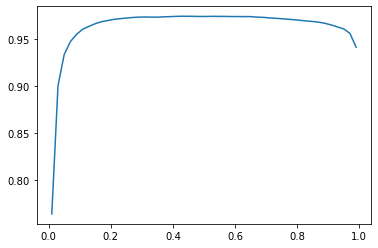

In [22]:
plt.plot(xs,accs)

The predictictions are high at the threshold value of 0.1 and above. The smoothness of the curve until what seems to be 0.9 shows that we wont be overfitting by picking a random value. Thus maintaining the threshold at 0.5 should result in non-biased predictions.

The learner can exported to deploy it on a server for an application. Run this notebook on JupyterNotebook server to use the following command to download the model as a .pkl file to the home directory.

In [23]:
learn.export("export.pkl")

**To import it into you new application use 'load_learner(export.pkl)'**

## 4. Test The Model that we just build

The model can be tested using iPython widgets. Here we are going to create a mini interface to upload images and classify them accordingly.

In [24]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')

In [26]:
def on_click_classify(change):
    
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    pred0 = pred[0]
    pred1 = pred[1]
    if pred0=='False':
        lbl_pred.value = f'This is a {pred1} for adults.'
    else:
        lbl_pred.value = f'This is a {pred1} for kids.'

In [31]:
btn_run.on_click(on_click_classify)

In [36]:
# Use Virtual Box to encapsulate the iPython widgets
VBox([widgets.Label('Upload a picture of a pice of clothing!'), 
      btn_upload, btn_run, out_pl, lbl_pred])